## Figures and error calculations

Probes ANK1 and ANK2 are fixed under the canyons to measure conductivity at the heads of the canyons. Electordes have been bent on purpose.

Looking at calibrations that are relevant to Chapter 4 of my thesis: August 17th and August 9th.

Channel order: CH1 - ANK1, CH2 - ANK2, CH3 - probe P21

In [106]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as Poly
import pandas as pd
import seaborn as sns
import scipy.io as sio
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
# Read density of saline solutions
df17 = pd.read_csv('../calibration_17aug19/calibration.csv')
df09 = pd.read_csv('../calibration_09aug19/calibration.csv')

In [18]:
# Read conduino measurements and the average 500 nsamples
nums = ['100','090','080','070','060','050','040','030','020','010','000']
file_num = len(nums)

# August 17
mean_read_ch1_17 = np.zeros(file_num)
std_read_ch1_17 = np.zeros(file_num)
mean_read_ch2_17 = np.zeros(file_num)
std_read_ch2_17 = np.zeros(file_num)

for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_17aug19/%spc.mat' %num
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1_17[ii] = np.mean(ch1)
    std_read_ch1_17[ii] = np.std(ch1)
    
    mean_read_ch2_17[ii] = np.mean(ch2)
    std_read_ch2_17[ii] = np.std(ch2)

# August 9
mean_read_ch1_09 = np.zeros(file_num)
std_read_ch1_09 = np.zeros(file_num)
mean_read_ch2_09 = np.zeros(file_num)
std_read_ch2_09 = np.zeros(file_num)

for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_09aug19/%spc.mat' %num
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1_09[ii] = np.mean(ch1)
    std_read_ch1_09[ii] = np.std(ch1)
    
    mean_read_ch2_09[ii] = np.mean(ch2)
    std_read_ch2_09[ii] = np.std(ch2)
 

In [81]:
# Fit 3rd deg polynomial
coef1_17, stats1_17 = Poly.polyfit(mean_read_ch1_17[:],np.array(df17.density)[:],3,full=True)
coef2_17, stats2_17 = Poly.polyfit(mean_read_ch2_17[:],np.array(df17.density)[:],3,full=True)

coef1_09, stats1_09 = Poly.polyfit(mean_read_ch1_09[:],np.array(df09.density)[:],3,full=True)
coef2_09, stats2_09 = Poly.polyfit(mean_read_ch2_09[:],np.array(df09.density)[:],3,full=True)

read_dummy = np.linspace(0,4.8,30)

fit1_17 = coef1_17[0]+(coef1_17[1]*read_dummy)+(coef1_17[2]*read_dummy**2) + (coef1_17[3]*read_dummy**3)
fit2_17 = coef2_17[0]+(coef2_17[1]*read_dummy)+(coef2_17[2]*read_dummy**2) + (coef2_17[3]*read_dummy**3)

fit1_09 = coef1_09[0]+(coef1_09[1]*read_dummy)+(coef1_09[2]*read_dummy**2) + (coef1_09[3]*read_dummy**3)
fit2_09 = coef2_09[0]+(coef2_09[1]*read_dummy)+(coef2_09[2]*read_dummy**2) + (coef2_09[3]*read_dummy**3)

# vector to calculate rmse
vec1_17 = coef1_17[0]+(coef1_17[1]*mean_read_ch1_17)+(coef1_17[2]*mean_read_ch1_17**2) + (coef1_17[3]*mean_read_ch1_17**3)
vec2_17 = coef2_17[0]+(coef2_17[1]*mean_read_ch2_17)+(coef2_17[2]*mean_read_ch2_17**2) + (coef2_17[3]*mean_read_ch2_17**3)

vec1_09 = coef1_09[0]+(coef1_09[1]*mean_read_ch1_09)+(coef1_09[2]*mean_read_ch1_09**2) + (coef1_09[3]*mean_read_ch1_09**3)
vec2_09 = coef2_09[0]+(coef2_09[1]*mean_read_ch2_09)+(coef2_09[2]*mean_read_ch2_09**2) + (coef2_09[3]*mean_read_ch2_09**3)

rmse_1_17 = (mean_squared_error(vec1_17, np.array(df17.density)[:]))**(0.5)
rmse_2_17 = (mean_squared_error(vec2_17, np.array(df17.density)[:]))**(0.5)
rmse_1_09 = (mean_squared_error(vec1_09, np.array(df09.density)[:]))**(0.5)
rmse_2_09 = (mean_squared_error(vec2_09, np.array(df09.density)[:]))**(0.5)

print('rmse are:')
print(rmse_1_17, rmse_2_17, rmse_1_09, rmse_2_09)

rmse are:
0.0010812513188054186 0.0008326668323341193 0.0003050796344691602 0.00013413378221801463


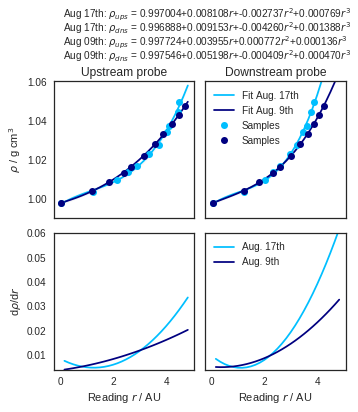

In [105]:
# Check what is the uncertainty of the densimeter

sns.set_style('white')
fig, ((ax0, ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(5,5), sharex=True)

ax0.errorbar(mean_read_ch1_17, df17.density, xerr=std_read_ch1_17, yerr=0.00005,
             marker='o', linewidth=0, color='deepskyblue', label='Measurements')
ax0.plot(read_dummy, fit1_17, '-',color='deepskyblue', label='Fitted function')
ax0.fill_between(read_dummy, fit1_17-rmse_1_17, fit1_17+rmse_1_17,
                 color='0.9',alpha=0.2)

ax1.errorbar(mean_read_ch2_17, df17.density, xerr=std_read_ch2_17,yerr=0.00005, 
             marker='o',linewidth=0,  color='deepskyblue', label='Samples')
ax1.plot(read_dummy, fit2_17, '-',color='deepskyblue', label='Fit Aug. 17th')
ax1.fill_between(read_dummy, fit2_17-rmse_2_17, fit2_17+rmse_2_17,
                 color='0.9',alpha=0.2)

ax0.errorbar(mean_read_ch1_09,df09.density, xerr=std_read_ch1_09,yerr=0.00005, 
             marker='o',linewidth=0,  color='navy', label='Measurements ')
ax0.plot(read_dummy, fit1_09, '-',color='navy', label='Measurements')
ax0.fill_between(read_dummy, fit1_09-rmse_1_09, fit1_09+rmse_1_09,
                 color='0.9',alpha=0.2)

ax1.errorbar(mean_read_ch2_09,df09.density, xerr=std_read_ch2_09, yerr=0.00005,
             marker='o',linewidth=0,  color='navy', label='Samples')
ax1.plot(read_dummy, fit2_09, '-',color='navy', label='Fit Aug. 9th')
ax1.fill_between(read_dummy, fit2_09-rmse_2_09, fit2_09+rmse_2_09,
                 color='0.9',alpha=0.2)


ax2.plot(read_dummy[1:],(fit1_17[1:]-fit1_17[:-1])/(read_dummy[1:]-read_dummy[:-1]),
         '-',color='deepskyblue', label='Aug. 17th')
ax2.plot(read_dummy[1:],(fit1_09[1:]-fit1_09[:-1])/(read_dummy[1:]-read_dummy[:-1]),
         '-',color='navy', label='Aug. 9th')

ax3.plot(read_dummy[1:],(fit2_17[1:]-fit2_17[:-1])/(read_dummy[1:]-read_dummy[:-1]),
         '-',color='deepskyblue', label='Aug. 17th')
ax3.plot(read_dummy[1:],(fit2_09[1:]-fit2_09[:-1])/(read_dummy[1:]-read_dummy[:-1]),
         '-',color='navy', label='Aug. 9th')

ax0.text(0.07,1.46,r'Aug 17th: $\rho_{ups}$ = %f+%f$r$+%f$r^2$+%f$r^3$' %(coef1_17[0], coef1_17[1], coef1_17[2], coef1_17[3]),
         transform=ax0.transAxes)
ax0.text(0.07,1.36,r'Aug 17th: $\rho_{dns}$ = %f+%f$r$+%f$r^2$+%f$r^3$' %(coef2_17[0], coef2_17[1], coef2_17[2], coef2_17[3]),
         transform=ax0.transAxes)
ax0.text(0.07,1.26,r'Aug 09th: $\rho_{ups}$ = %f+%f$r$+%f$r^2$+%f$r^3$' %(coef1_09[0], coef1_09[1], coef1_09[2], coef1_09[3]),
         transform=ax0.transAxes)
ax0.text(0.07,1.16,r'Aug 09th: $\rho_{dns}$ = %f+%f$r$+%f$r^2$+%f$r^3$' %(coef2_09[0], coef2_09[1], coef2_09[2], coef2_09[3]),
         transform=ax0.transAxes)

ax0.set_ylabel(r'$\rho$ / g cm$^3$')
ax2.set_xlabel(r'Reading $r$ / AU')
ax3.set_xlabel(r'Reading $r$ / AU')
ax2.set_ylabel(r'd$\rho$/d$r$')
ax0.set_title('Upstream probe')
ax1.set_title('Downstream probe')
ax0.set_ylim(0.99,1.06)
ax1.set_ylim(0.99,1.06)
ax2.set_ylim(0.004,0.06)
ax3.set_ylim(0.004,0.06)
ax1.set_yticks([])
ax3.set_yticks([])
ax1.legend()
ax3.legend()
plt.tight_layout()
plt.savefig('../../notebooks/figures/calibration_ANKS.eps', format='eps', transparent=False, bbox_inches='tight')

In [107]:
del_rho = interp1d(read_dummy[1:],(fit1_17[1:]-fit1_17[:-1])/(read_dummy[1:]-read_dummy[:-1]))


In [109]:
error_rho = del_rho(3.060)*0.29

In [110]:
error_rho

0.0035605883485327933